In [30]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import stemgraphic

In this notebook, we are answering questions in section 1.6.1 of Statistics and Data Analysis \cite{statsAndData}.

<h1>Excercises 1.6.1</h1>
<h2>Exercise 1</h2>
<p>For the first exercise, the authors give us two data sets.  The first thing they ask for is the 5 descriptive statistics for the two groups. The first data set, along with the 5 descriptive statisics of min, max, $Q_1$, $Q_2$ (median), and $Q_3$ are in the next cell. $Q_1$ is to the number to the right of the 25% value in the cell below, $Q_2$ is the number to the right of the 50% in the cell below, and $Q_3$ is the number to the right of the 75% in the cell below.</p>

In [4]:
group_1 = [153, 150, 132, 123, 148, 146, 140, 154, 137, 112]
group_1 = sorted(group_1)
# for easier viewing along with desicriptive statisics:
print(group_1)
group_1_series = pd.Series(group_1)
group_1_series.describe()

[112, 123, 132, 137, 140, 146, 148, 150, 153, 154]


count     10.000000
mean     139.500000
std       13.778002
min      112.000000
25%      133.250000
50%      143.000000
75%      149.500000
max      154.000000
dtype: float64

The data for the second group, along with the 5 statisics for it are in the next cell.  Find the values for $Q_1$, $Q_2$, and $Q_3$ according to the description for the data of the first group above.

In [6]:
group_2  = [148, 113, 69, 129, 150, 129, 157, 184, 143, 167, 141, 179, 124, 130, 166]
group_2 = sorted(group_2)
group_2_series = pd.Series(group_2)
group_2_series.describe()

count     15.000000
mean     141.933333
std       28.830705
min       69.000000
25%      129.000000
50%      143.000000
75%      161.500000
max      184.000000
dtype: float64

<p>The next thing the authors require for question 1 is the fences for both groups of data.</p>
<p>In order to compute the fences for the first group, we must first compute the interquartile range for the group_1 data.  This is $IQR = Q_3-Q_1 = 149.5 - 133.25 = 16.25$. </p>
<p>The next step in computing the fences is to compute $h=1.5IQR = 1.5\left(16.25\right) = 24.375$.</p>
<p>Finally, we compute lower and upper inner fences, $LIF$, and $UIF$ of the group 1 data.</p>
<p>$LIF = Q_1 - h = 133.25-24.375 = 108.875$.</p>
<p>$UIF=Q_3 + h = 149.5  + 24.375= 173.875$.</p>
<p>We do similar calculations to compute the fences for the second group.  We write a function in Python below to do the calculation, for possible future use</p>

In [15]:
def get_fences(series_description):
    """
    this method assumes the parameter passed
    is the output of the describe function of
    some Pandas series
    : param series_description: Pandas Series describe() output
    : return : tuple containing the lower inner fence as its first value,
    and the upper inner fence as its second value
    """
    q1 = series_description['25%']
    q3 = series_description['75%']
    iqr = q3 - q1
    h = 1.5 * iqr
    lower_inner_fence = q1 - h
    upper_inner_fence = q3 + h
    return (lower_inner_fence, upper_inner_fence)
fences = get_fences(group_2_series.describe())
print('lower inner fence = %f, upper inner fence = %f' % fences)


lower inner fence = 80.250000, upper inner fence = 210.250000


The thing the authors want us to do for the first exercise is to draw box plots of the data for both groups.  We use the Seaborn library to make the box plots.  First we need to pad the data so that they are the same length, and add labels so that we can properly draw the box plots with Seaborn's boxplot function.

In [21]:
group_1_copy = group_1.copy()
group_1.extend([np.NaN]*(len(group_2)-len(group_1)))
len(group_1)

15

In [22]:
labels = ['group 1']*len(group_1)
labels.extend(['group 2']*len(group_2))

In [23]:
group_1.extend(group_2)

In [25]:
df = pd.DataFrame({'labels':labels, 'values':group_1})

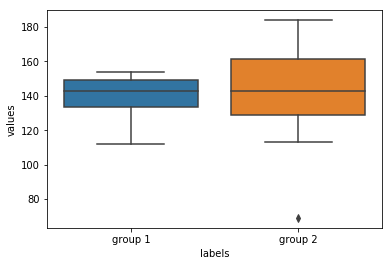

In [26]:
sns.boxplot(data=df, x='labels', y='values')

<p>This boxplot looks OK, but we are not happy with all lines of code we find it necessary to write to get the data in a form that is amenable to Seaborn's boxplot function.</p>

<h2>Question 2</h2>
<p>For question 2, the authors ask for back-to-back stem-leaf plots of the heights of the hitters and pitchers from the baseball data.  The stem-leaf plots are in the cell below.  Appendix A.1 of \cite{statsAndData} explains that the fifth column of the baseball data is 0 if the player is a pitcher, and 1 if the player is a fielder.  Any player can be a hitter, so if we take the question literally, we should make a stem-leaf plot of a data set containing data for the hitters only, and another stem-leaf plot of all the data.</p>
<p>However, we believe it is the authors' intention that we compare stem leaf plots of data sets where the we partition the baseball data into hitters, and fielders, so we will create stem-leaf plots of:</p>
<ul>
    <li>all the baseball data</li>
    <li>the subset of fielders, and</li>
    <li>the subset of pitchers.</li>
    </ul>

In [40]:
baseball_df=pd.read_csv('../baseball-data.csv', header=None, sep=' ')

/home/jhancock2010/venv/2018-11-04-py3.6/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


(<Figure size 540x270 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7f2540435b00>)

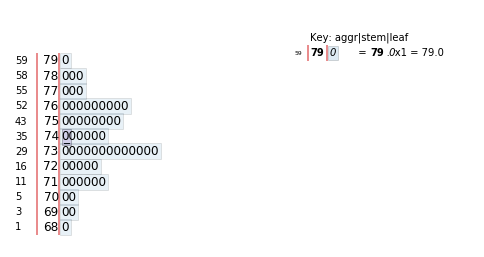

In [34]:
stemgraphic.stem_graphic(df[0])

/home/jhancock2010/venv/2018-11-04-py3.6/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


(<Figure size 540x216 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7f25400ec8d0>)

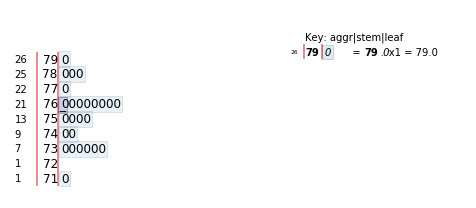

In [38]:
hitters_heights=df[df[4]==0][0]
stemgraphic.stem_graphic(hitters_heights)

/home/jhancock2010/venv/2018-11-04-py3.6/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


(<Figure size 540x234 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7f25400e7a20>)

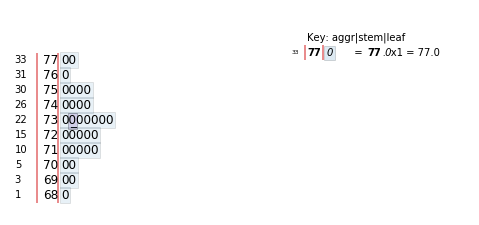

In [39]:
stemgraphic.stem_graphic(df[df[4] != 0][0])

<p>The stem plots imply that pitchers are taller than fielders, but we find it difficult to draw a conclusion about a distinction between pitchers and hitters since any pitcher is also a hitter.</p>

<h2>Exercise 3</h2>

<p>Exercise 3 asks us to find the fences in the height data for both groups of data, the hitters and the pitchers.  We reuse the method we wrote above to calculate the fences for pitchers, hitters, and fielders.</p>

In [49]:
pitcher_heights = baseball_df[baseball_df[4] == 0][0]
print('Pitcher heights lower inner fence = %f, and pitcher heights upper inner fence = %f'
      % get_fences(pitcher_heights.describe()))

Pitcher heights lower inner fence = 69.125000, and pitcher heights upper inner fence = 80.125000


In [50]:
hitter_heigts = baseball_df[0]
print('Hitter heights lower inner fence = %f, and pitcher heights upper inner fence = %f'
      % get_fences(hitter_heigts.describe()))

Hitter heights lower inner fence = 66.000000, and pitcher heights upper inner fence = 82.000000


In [52]:
fielder_heights = baseball_df[baseball_df[4] != 0][0]
print('Fielder heights lower inner fence = %f, and pitcher heights upper inner fence = %f'
      % get_fences(fielder_heights.describe()))

Fielder heights lower inner fence = 66.500000, and pitcher heights upper inner fence = 78.500000


<p>In Exercise 3 the authors also ask for comparison box plots of the data.  It is easier to manipulate the original baseball data to use Seaborn's boxplot function to create the comparison box plots. We first perform this manipulation, and then draw the box plots.</p> 

/home/jhancock2010/venv/2018-11-04-py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


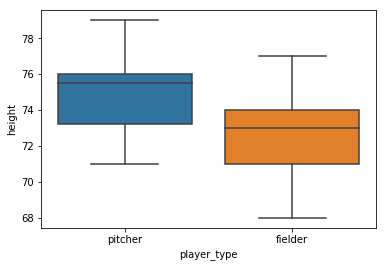

In [69]:
baseball_heights_df=baseball_df[[0,4]]
baseball_heights_df.columns=['height', 'player_type_id']
baseball_heights_df['player_type'] =  baseball_heigts_df.player_type_id.map(lambda x:  'pitcher' if x==0 else 'fielder')
sns.boxplot(x='player_type', y='height', data=baseball_heights_df)

<p>We see from the box plots that there are no outliers.  Also, since we calculated the fences for the data, we see that no value for height in any of the data sets is greater than the corresponding upper inner fence for that data set, and no value for height in any of the data sets is less than the lower inner fence for that data set.</p>

<h2>Exercise 4</h2>
<p>For exercise 4 the authors want us to make a determination of the relative quality of battery brands.  
They give three set of battery life data for three brands of batteries - brand A, brand B, and brand C, and ask us to rank battery brands after some analysis of the battery life data.  We did a Google \cite{google} search to find out about current methods for using Python for comparing datasets. Our search returned a link to the Scipy Lecture Notes \cite{scipyLecturesCh3}.  These lecture notes describe the Student 2 sample t-test for testing for difference across populations.  We have three populations to test, so we cannot use the Student 2 sample t-test, so we did another Google search for some similar test with three populations, and found that the Scipy Python Library \cite{scipyAnova} has a function for analysis of variance (ANOVA)  that we can use to, "...test the null
hypothesis that two or more groups have the same population mean." In the cell below we prepare the data the authors give for exercise 4 and then use Scipy to test whether or not the mean values of the three data sets the authors give are different.</p>

In [ ]:
%%latex
\begin{thebibliography}{99}

\bibitem{statsAndData} A.Abebe, J. Daniels, and J. W. McKean, \textit{Statistics and Data Analysis},
  2nd ed. Western Michigan University,Kalamzoo, MI: Statistical Computation Lab (SCL), 2001. [E-book] Available:
  \url{http://www.stat.wmich.edu/s160/hcopy/book.pdf}.

\bibitem{scipyLecturesCh3} Gaël Varoquaux, ``Scipy Lecture Notes,'' www.scipy-lectures.org, 
  3.1.2.1. Student’s t-test: the simplest statistical test, October 2018. [Online]. 
  Available: \url{https://www.scipy-lectures.org/packages/statistics/index.html}. [Accessed Dec.31, 2018]

\bibitem{google} Google, Inc., ``Gooogle,''Google Search Engine, 2018. [Online]. 
  Available: http://google.com. [Accessed: Jan. 1, 2019]
            
\bibitem{scipyAnova} The SciPy community, ``scipy.stats.f_oneway,'' www.scipy-lectures.org, Dec. 17, 2018.
  [Online]. Available: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html.
  [Accessed Jan. 1, 2019

\end{thebibliography} 